In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

In [33]:
def calculate_rotation_angle(a, b):
    """
    Calculate the rotation angle (in degrees) given the major (a) and minor (b) axes.
    """
    # Ensure a >= b to avoid errors
    if a < b:
        raise ValueError("Major axis a should be greater than or equal to minor axis b.")
    
    # Calculate the rotation angle in radians
    theta_rad = np.arccos(b / a)
    theta_deg = np.degrees(theta_rad)
    
    return theta_rad, theta_deg

def correct_speed(v_proj, theta_rad):
    """
    Correct the measured speed given the rotation angle (in radians).
    """
    v_real = v_proj / np.cos(theta_rad)
    return v_real

def plot_circle_ellipse(a, b, theta_deg):
    """
    Plot the original circle and the rotated ellipse.
    """
    # Parametric equations for the circle and ellipse
    t = np.linspace(0, 2*np.pi, 100)
    x_circle = np.cos(t)
    y_circle = np.sin(t)
    
    # Ellipse after rotation
    x_ellipse = b * np.cos(t)
    y_ellipse = a * np.sin(t)
    
    # Make a plot
    fig = plt.figure(figsize=[12,6])
    
    ax = fig.add_subplot(121)
    ax.plot(x_circle, y_circle)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title('Original Circle')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.grid()
    
    ax = fig.add_subplot(122)
    ax.plot(x_ellipse, y_ellipse, label=f'Rotated Circle (Angle = {theta_deg:.2f}°)')
    # ax.set_aspect(1)
    ax.legend(loc='upper left')
    ax.set_title('Projected Ellipse')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.grid()
    
    fig.tight_layout()
    plt.show()

Rotation angle (radians): 1.0472, (degrees): 60.00
Projected speed: 10.0, Corrected real speed: 20.00


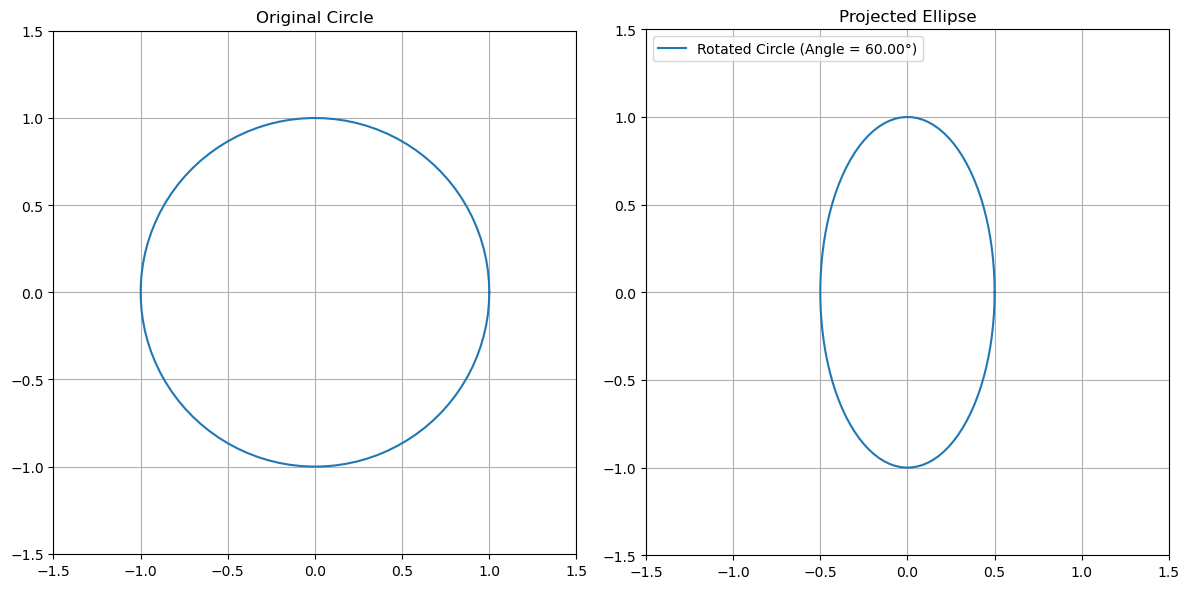

In [34]:
# Example usage
a = 1.0  # Major axis of the ellipse
b = 0.5  # Minor axis of the ellipse
v_proj = 10.0  # Projected speed measured by the observer

# Step 1: Calculate the rotation angle
theta_rad, theta_deg = calculate_rotation_angle(a, b)
print(f"Rotation angle (radians): {theta_rad:.4f}, (degrees): {theta_deg:.2f}")

# Step 2: Correct the speed
v_real = correct_speed(v_proj, theta_rad)
print(f"Projected speed: {v_proj}, Corrected real speed: {v_real:.2f}")

# Step 3: Plot the circle and the ellipse
plot_circle_ellipse(a, b, theta_deg)

In [45]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d_circle_in_yz_plane_and_rotate(a, b, theta_deg):
    """
    Plot a flat filled circle in the YZ plane and rotate it with the given angle.
    The rotation will be applied around the X-axis.
    """
    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Parametric circle in 2D (YZ-plane) before rotation
    t = np.linspace(0, 2 * np.pi, 400)
    y_circle = np.cos(t)  # Circle in the YZ plane
    z_circle = np.sin(t)   # Circle in the YZ plane
    x_circle = np.zeros_like(y_circle)  # Flat circle in the YZ-plane (x = 0)

    # Plot the flat circle
    ax.plot(x_circle, y_circle, z_circle, label='Flat Circle (before rotation)', color='blue')

    # Fill the circle to create a flat disk
    verts = [list(zip(x_circle, y_circle, z_circle))]
    ax.add_collection3d(Poly3DCollection(verts, color='blue', alpha=0.3))

    # Set the aspect of the plot and the limits
    ax.set_box_aspect([1, 1, 1])  # Equal scaling
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])

    # Label the axes
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Rotate the view according to the calculated angle
    ax.view_init(elev=70, azim=theta_deg)
    plt.title(f"3D Circle in YZ Plane Rotated by {theta_deg:.2f}° Around X-axis")
    plt.show()

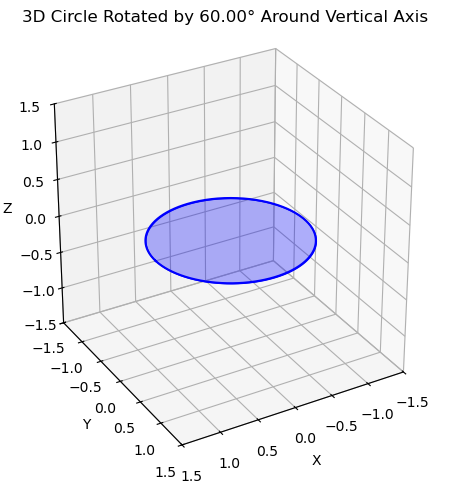

In [46]:
# Step 2: Plot the 3D circle and rotate the view
plot_3d_circle_and_rotate(a, b, theta_deg)

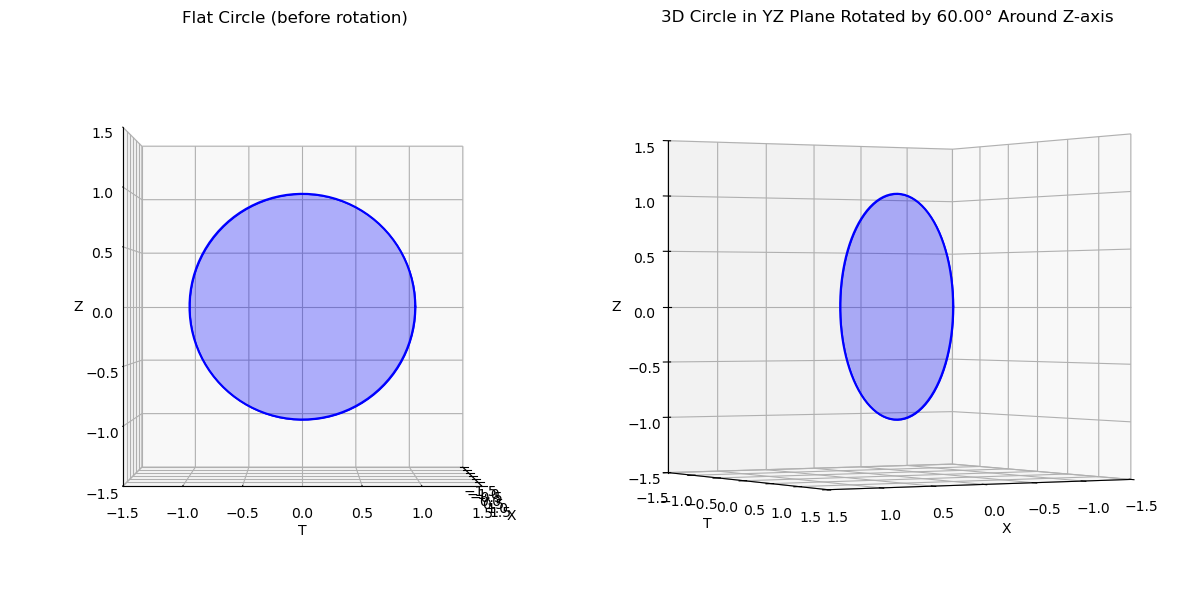

In [58]:
# Parametric circle in 2D (YZ-plane) before rotation
t = np.linspace(0, 2*np.pi, 100)
y_circle = np.cos(t)  # Circle in the YZ plane
z_circle = np.sin(t)   # Circle in the YZ plane
x_circle = np.zeros_like(y_circle)  # Flat circle in the YZ-plane (x = 0)

# Make a figure and a 3D axis
fig = plt.figure(figsize=[12,6])

ax = fig.add_subplot(121, projection='3d')
# Plot the flat circle
ax.plot(x_circle, y_circle, z_circle, color='blue')
# Fill the circle to create a flat disk
verts = [list(zip(x_circle, y_circle, z_circle))]
ax.add_collection3d(Poly3DCollection(verts, color='blue', alpha=0.3))
# Set the aspect of the plot and the limits
ax.set_box_aspect([1, 1, 1])  # Equal scaling
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('Z')
ax.set_title('Flat Circle (before rotation)')
ax.view_init(elev=0, azim=0)

ax = fig.add_subplot(122, projection='3d')
# Plot the flat circle
ax.plot(x_circle, y_circle, z_circle, color='blue')
# Fill the circle to create a flat disk
verts = [list(zip(x_circle, y_circle, z_circle))]
ax.add_collection3d(Poly3DCollection(verts, color='blue', alpha=0.3))
# Set the aspect of the plot and the limits
ax.set_box_aspect([1, 1, 1])  # Equal scaling
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('Z')
# Rotate the view according to the calculated angle
ax.view_init(elev=0, azim=theta_deg)
ax.set_title(f'3D Circle in YZ Plane Rotated by {theta_deg:.2f}° Around Z-axis')

fig.tight_layout()
plt.show()

### Real example with the tornado

Rotation angle (radians): 1.0241, (degrees): 58.68
Projected speed: 121.21 km/s, Corrected real speed: 233.15 km/s


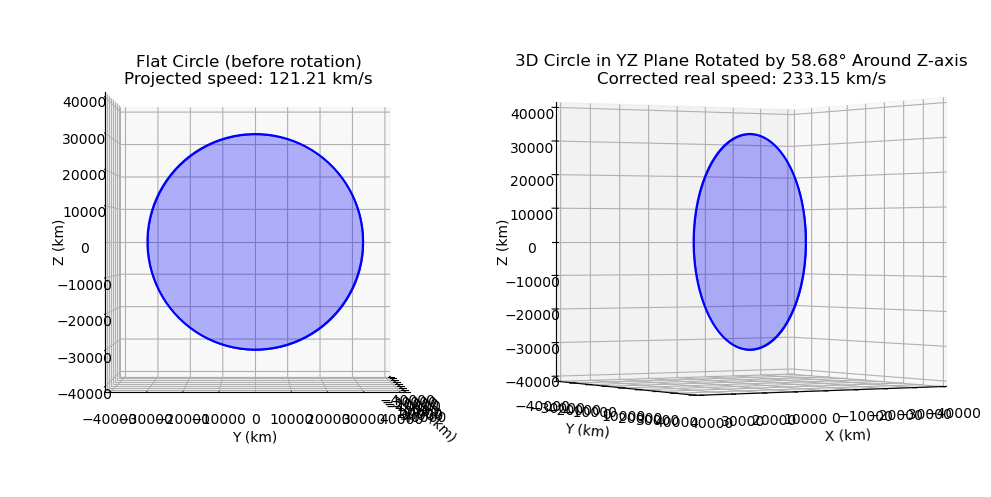

In [73]:
major_axis      = 31511.2 # in km
minor_axis      = 16382.1 # in km
projected_speed = 121.21  # in km/s

# Step 1: Calculate the rotation angle
theta_rad, theta_deg = calculate_rotation_angle(major_axis, minor_axis)
print(f"Rotation angle (radians): {theta_rad:.4f}, (degrees): {theta_deg:.2f}")

# Step 2: Correct the speed
v_real = correct_speed(projected_speed, theta_rad)
print(f'Projected speed: {projected_speed:.2f} km/s, Corrected real speed: {v_real:.2f} km/s')

# Parametric circle in 2D (YZ-plane) before rotation
t = np.linspace(0, 2*np.pi, 100)
y_circle = major_axis*np.cos(t)  # Circle in the YZ plane
z_circle = major_axis*np.sin(t)   # Circle in the YZ plane
x_circle = np.zeros_like(y_circle)  # Flat circle in the YZ-plane (x = 0)

# Make a figure and a 3D axis
fig = plt.figure(figsize=[10,6])

ax = fig.add_subplot(121, projection='3d')
# Plot the flat circle
ax.plot(x_circle, y_circle, z_circle, color='blue')
# Fill the circle to create a flat disk
verts = [list(zip(x_circle, y_circle, z_circle))]
ax.add_collection3d(Poly3DCollection(verts, color='blue', alpha=0.3))
# Set the aspect of the plot and the limits
ax.set_box_aspect([1, 1, 1])  # Equal scaling
ax.set_xlim([-major_axis-1e4, major_axis+1e4])
ax.set_ylim([-major_axis-1e4, major_axis+1e4])
ax.set_zlim([-major_axis-1e4, major_axis+1e4])
# Label the axes
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title(f'Flat Circle (before rotation)\nProjected speed: {projected_speed:.2f} km/s', y=0.9)
ax.view_init(elev=0, azim=0)

ax = fig.add_subplot(122, projection='3d')
# Plot the flat circle
ax.plot(x_circle, y_circle, z_circle, color='blue')
# Fill the circle to create a flat disk
verts = [list(zip(x_circle, y_circle, z_circle))]
ax.add_collection3d(Poly3DCollection(verts, color='blue', alpha=0.3))
# Set the aspect of the plot and the limits
ax.set_box_aspect([1, 1, 1])  # Equal scaling
ax.set_xlim([-major_axis-1e4, major_axis+1e4])
ax.set_ylim([-major_axis-1e4, major_axis+1e4])
ax.set_zlim([-major_axis-1e4, major_axis+1e4])
# Label the axes
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
# Rotate the view according to the calculated angle
ax.view_init(elev=0, azim=theta_deg)
ax.set_title(f'3D Circle in YZ Plane Rotated by {theta_deg:.2f}° Around Z-axis\nCorrected real speed: {v_real:.2f} km/s', y=0.9)

fig.tight_layout()
plt.show()

In [67]:
major_axis

31511.2